# Face Detection and Spatial Transformations
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [4]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-macosx_10_16_x86_64.whl (53.9 MB)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### With OpenCv

In [40]:
def face_detection(path):
    # haar cascade
    cascade_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_path)

    # Read image and convert to grayscale image
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100, 100),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))
    plt.imshow(image, cmap='gray')
    plt.show()

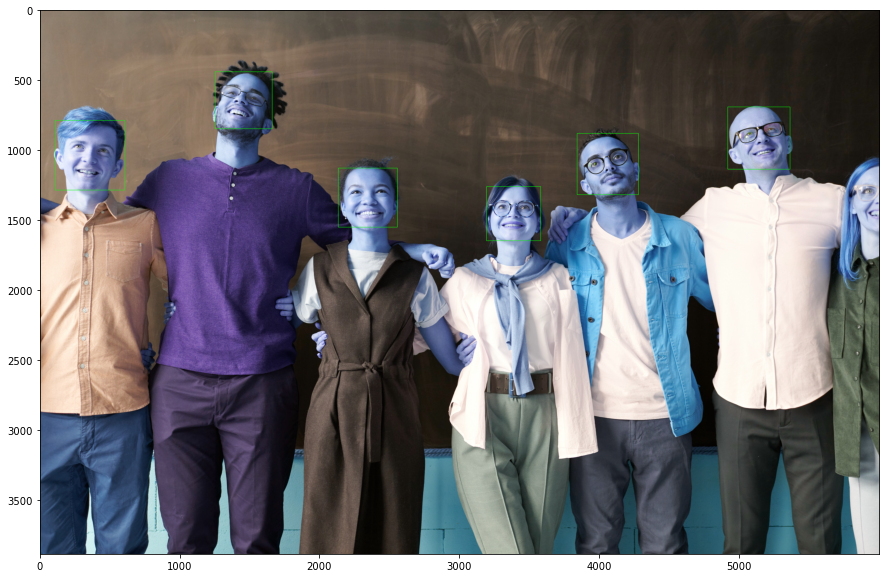

In [41]:
face_detection('Images/image1.jpg')

## Conclusion for this problem
Write a conclusion and references which you've used in your homework